# Objective : We have to predict that whether a mushroom species is edible or poisnous.

In this task we have to predict that whether a mushroom species is edible or poisnous on the basis of analysing the various columns given in the datasets like cap-shape, cap-surface, etc.

* The target column is the class.

#### Importing various important libraries required for analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
mush = pd.read_csv('./Downloads/mushrooms.csv')
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Getting to know the dimension, description and pressence of the null values in the dataset.

In [3]:
mush.shape

(8124, 23)

In [4]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

* By looking at the description we get to know the  top value, unique value and the  frequency of occurance of the  top value in each column of the given dataset.
* By looking at the null values of the dataset we get to that there is none present in it.
* By looking at the dimension of the dataset we get to know that it contains 8124 rows and 23 columns.

#### EDA

1. cap-shape.

In [6]:
mush['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


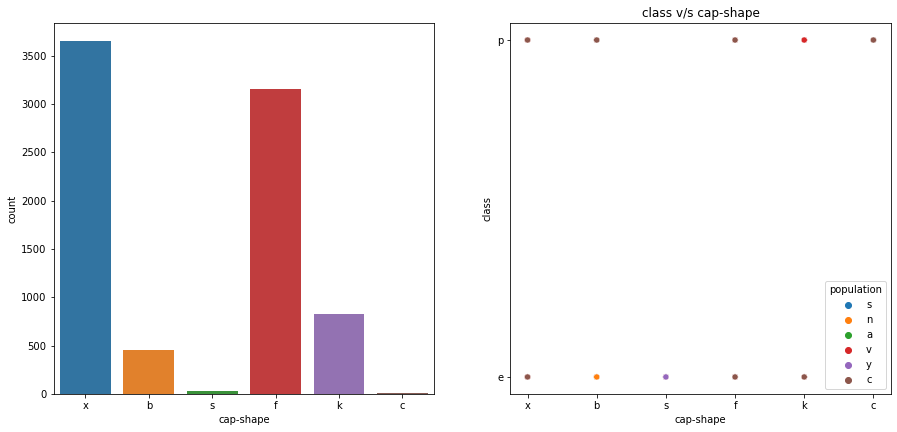

In [7]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['cap-shape'])
plt.xlabel('cap-shape')
plt.subplot(222)
sns.scatterplot(x= 'cap-shape', y= 'class', data= mush, hue= 'population')
plt.xlabel('cap-shape')
plt.ylabel('class')
plt.title('class v/s cap-shape')
plt.show()

By observing both the graph of cap-shape we can conclude that most number of the mushrooms have x cap-shape from the countplot and from the scatterplot we can conclude that mushrooms with s cap-shape has only edible mushrooms present in it and mushrooms with c cap-shape has only poisnous mushrooms present in it. The rest of the species of the cap-shape have both edible as well as poisnous mushrooms present in them.

2. cap-surface

In [8]:
mush['cap-surface'].unique()

array(['s', 'y', 'f', 'g'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


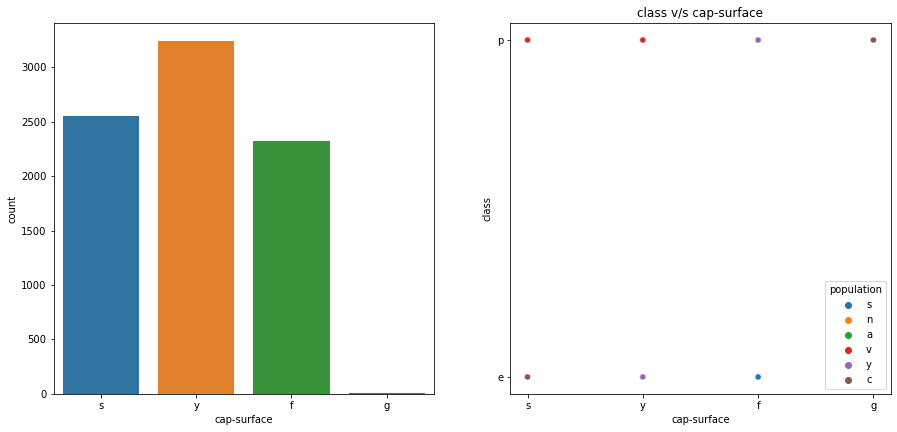

In [9]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['cap-surface'])
plt.xlabel('cap-surface')
plt.subplot(222)
sns.scatterplot(x= 'cap-surface', y= 'class', data= mush, hue= 'population')
plt.xlabel('cap-surface')
plt.ylabel('class')
plt.title('class v/s cap-surface')
plt.show()

By looking at both the graph of cap-surface we can conclude that most number of mushrooms have y cap-surface from the countplot and from the scatterplot we cannot conclude anything of this column.

3. cap-color.

In [10]:
mush['cap-color'].unique()

array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


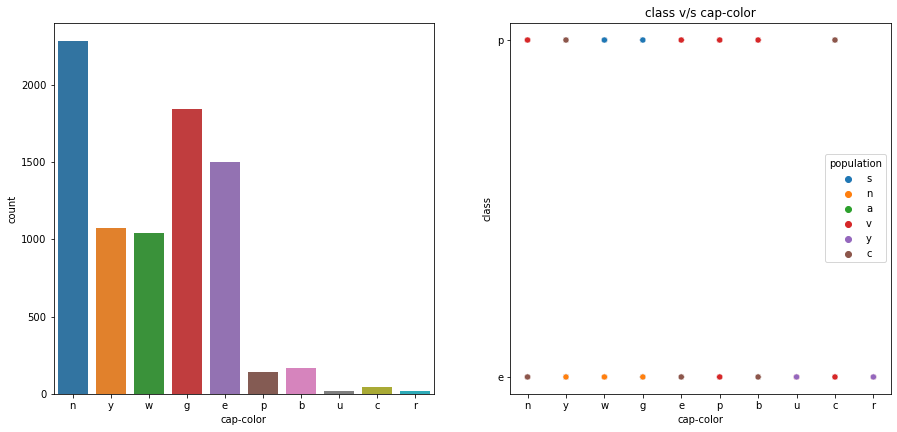

In [11]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['cap-color'])
plt.xlabel('cap-color')
plt.subplot(222)
sns.scatterplot(x= 'cap-color', y= 'class', data= mush, hue= 'population')
plt.xlabel('cap-color')
plt.ylabel('class')
plt.title('class v/s cap-color')
plt.show()

By looking at both graphs of cap-color we can conclude that most of the mushrooms are present with the n cap-color from the countplot and from the scatterplot we can conclude that mushrooms with u and r cap-color have only edible mushrooms present in them and rest of the species of cap-color in mushrooms have both edible as well as poisnous mushrooms present in them.

4. bruises

In [12]:
mush['bruises'].unique()

array(['t', 'f'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


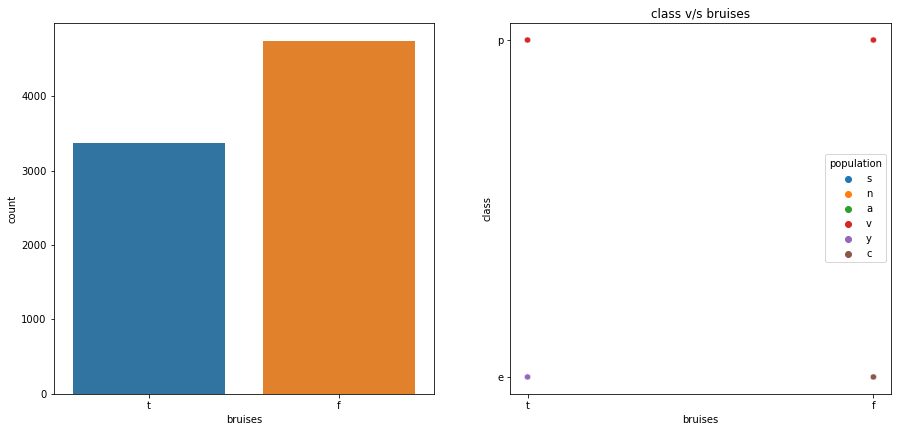

In [13]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['bruises'])
plt.xlabel('bruises')
plt.subplot(222)
sns.scatterplot(x= 'bruises', y= 'class', data= mush, hue= 'population')
plt.xlabel('bruises')
plt.ylabel('class')
plt.title('class v/s bruises')
plt.show()

By looking at both the graphs of bruises we can conclude that most of the mushrooms are present with the f bruises on it from the countplot and from the scatterplot we cannot conclude anything.

5. odor.

In [14]:
mush['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


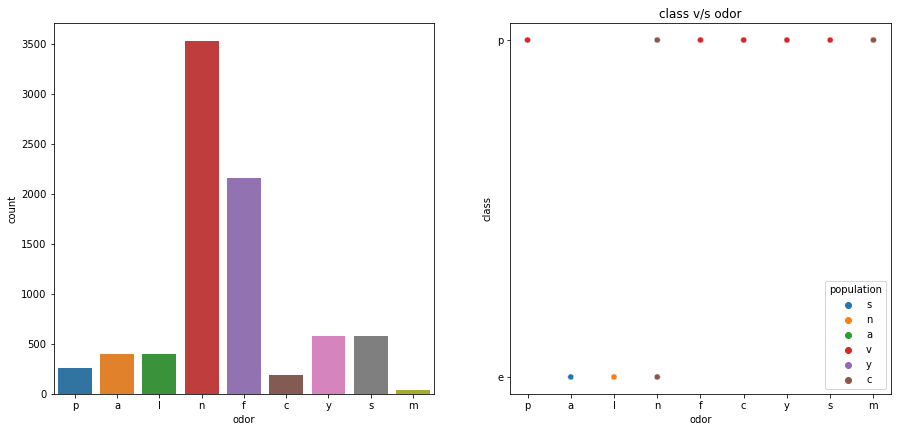

In [15]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['odor'])
plt.xlabel('odor')
plt.subplot(222)
sns.scatterplot(x= 'odor', y= 'class', data= mush, hue= 'population')
plt.xlabel('odor')
plt.ylabel('class')
plt.title('class v/s odor')
plt.show()

By looking at both the graphs of the odor we can conclude that most of the mushrooms are present with the odor n from the countplot and from the scatterplot we can conclude that mushrooms with a, l, and n odor have only edible mushrooms present in them and rest of the odor species of mushrooms have both edible and poisnous mushrooms resent in them.

6. gill-attachment

In [16]:
mush['gill-attachment'].unique()

array(['f', 'a'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


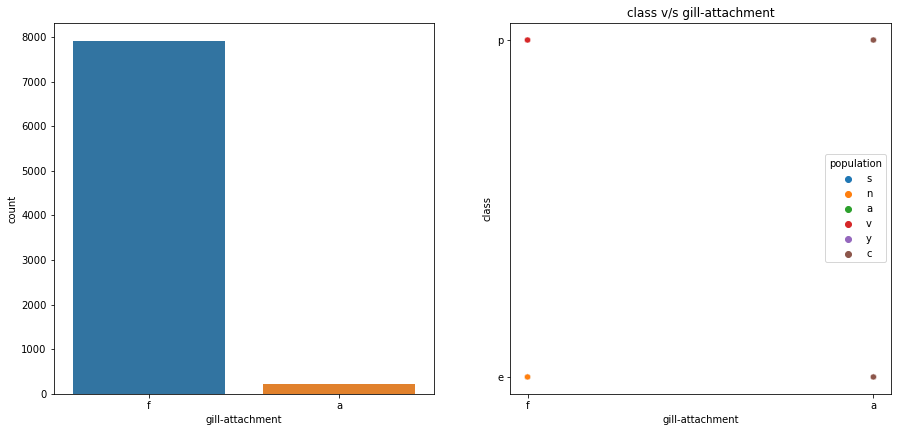

In [17]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['gill-attachment'])
plt.xlabel('gill-attachment')
plt.subplot(222)
sns.scatterplot(x= 'gill-attachment', y= 'class', data= mush, hue= 'population')
plt.xlabel('gill-attachment')
plt.ylabel('class')
plt.title('class v/s gill-attachment')
plt.show()

By looking at both the graphs of gill-attachment we can conclude that most of the mushrooms are present with f gill-attachment from the countplot and from the scatterplot we cannot conclude anything.

7. gill-color

In [18]:
mush['gill-color'].unique()

array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
      dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


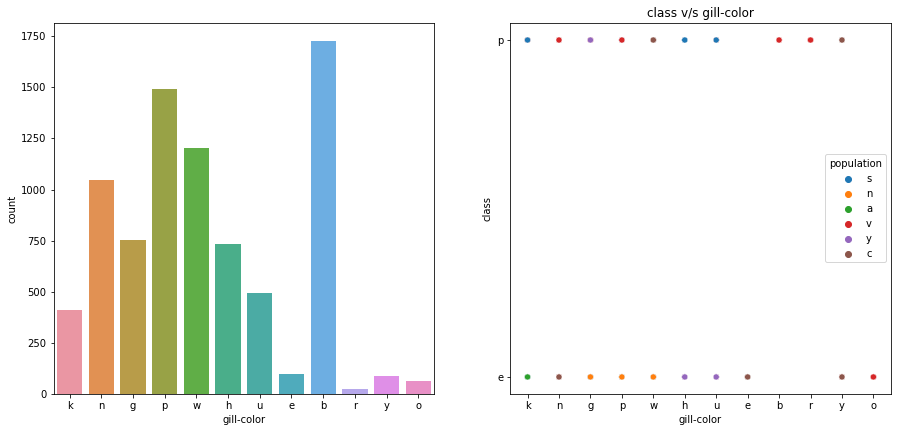

In [19]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['gill-color'])
plt.xlabel('gill-color')
plt.subplot(222)
sns.scatterplot(x= 'gill-color', y= 'class', data= mush, hue= 'population')
plt.xlabel('gill-color')
plt.ylabel('class')
plt.title('class v/s gill-color')
plt.show()

By looking at both the graphs of gill-color we can conclude that most mushrooms are present with b gill-color from the countplot and from the scatterplot we can conclude that mushrooms with b and r gill-color have only poisnous mushrooms present in them and mushrooms with e and o gill-color have only edible mushrooms present in them. The rest of the gill-color species have both edible as well as poisnous mushrooms present in them.

8. gill-size

In [20]:
mush['gill-size'].unique()

array(['n', 'b'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


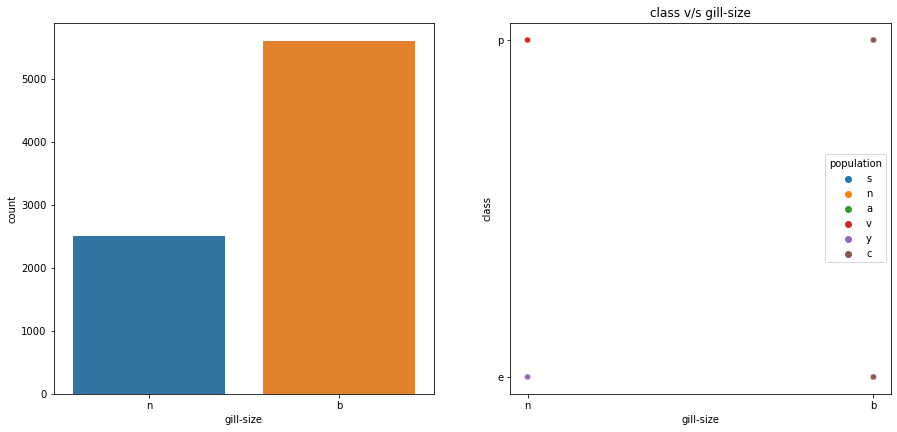

In [21]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['gill-size'])
plt.xlabel('gill-size')
plt.subplot(222)
sns.scatterplot(x= 'gill-size', y= 'class', data= mush, hue= 'population')
plt.xlabel('gill-size')
plt.ylabel('class')
plt.title('class v/s gill-size')
plt.show()

By looking at both the graphs of gill-size we can conclude that most of the mushrooms present with the b gill-size from the countplot and from the scatterplot we cannot conclude anything.

9. gill-spacing.

In [22]:
mush['gill-spacing'].unique()

array(['c', 'w'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


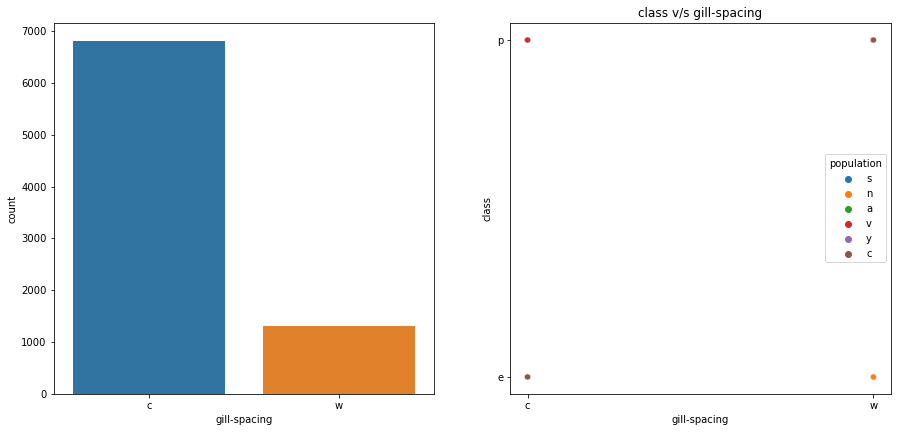

In [23]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['gill-spacing'])
plt.xlabel('gill-spacing')
plt.subplot(222)
sns.scatterplot(x= 'gill-spacing', y= 'class', data= mush, hue= 'population')
plt.xlabel('gill-spacing')
plt.ylabel('class')
plt.title('class v/s gill-spacing')
plt.show()

By looking at both the graphs of gill-spacing we canconclude that most mushrooms are present with c gill spacing from the countplot and from the scatterplot we cannot conclude anything.

10. stalk-root

In [24]:
mush['stalk-root'].unique()

array(['e', 'c', 'b', 'r', '?'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


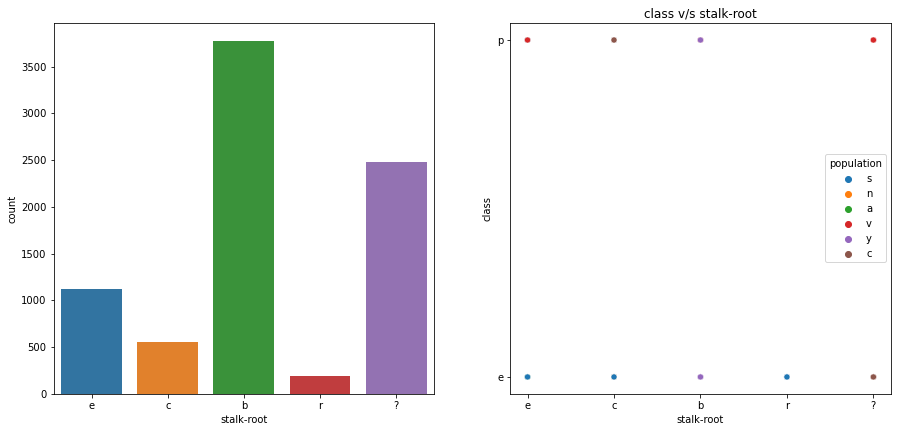

In [25]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['stalk-root'])
plt.xlabel('stalk-root')
plt.subplot(222)
sns.scatterplot(x= 'stalk-root', y= 'class', data= mush, hue= 'population')
plt.xlabel('stalk-root')
plt.ylabel('class')
plt.title('class v/s stalk-root')
plt.show()

By looking at both the graphs of stalk-root we can conclude that most mushrooms are present with b stalk-root from the countplot and from the scatterplot we can conclude that mushrooms with r stalk-root has only edible mushrooms present in it and rest of the other stalk-root species have both edible as well as poisnous mushrooms present in them.

11. stalk-shape

In [26]:
mush['stalk-shape'].unique()

array(['e', 't'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


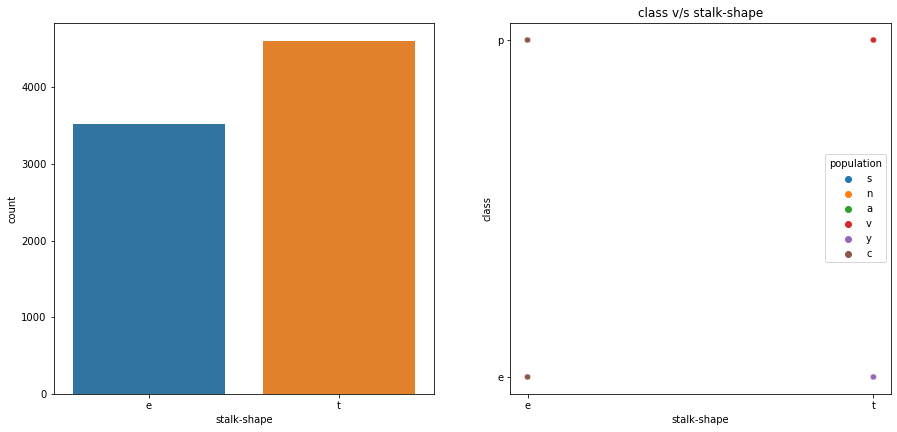

In [27]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['stalk-shape'])
plt.xlabel('stalk-shape')
plt.subplot(222)
sns.scatterplot(x= 'stalk-shape', y= 'class', data= mush, hue= 'population')
plt.xlabel('stalk-shape')
plt.ylabel('class')
plt.title('class v/s stalk-shape')
plt.show()

By looking at both the graphs of stalk-shape we can conclude that most mushrooms are present with t stalk-shape from the countplot and from the scatterplot we cannot conclude anything.

12. stalk-color-above-ring

In [28]:
mush['stalk-color-above-ring'].unique()

array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


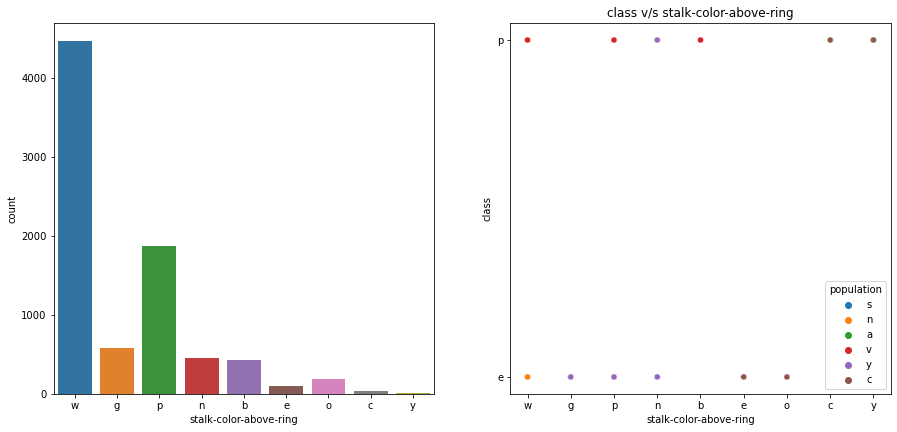

In [29]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['stalk-color-above-ring'])
plt.xlabel('stalk-color-above-ring')
plt.subplot(222)
sns.scatterplot(x= 'stalk-color-above-ring', y= 'class', data= mush, hue= 'population')
plt.xlabel('stalk-color-above-ring')
plt.ylabel('class')
plt.title('class v/s stalk-color-above-ring')
plt.show()

By looking at both the graphs of stalk-color-above-ring we can conclude that most mushrooms are present with w stalk-color-above-ring from the countplot and from the scatterplot we can conclude that mushrooms with g, e and o stalk-color-above-ring have only edible mushrooms present in them and mushrooms with b, c and y stalk-color-above-ring have only poisnous mushrooms present in them. The rest of the stalk-color-above-ring species have both edible as well as poisnous mushrooms present in them.

13. stalk-color-below-ring

In [30]:
mush['stalk-color-below-ring'].unique()

array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


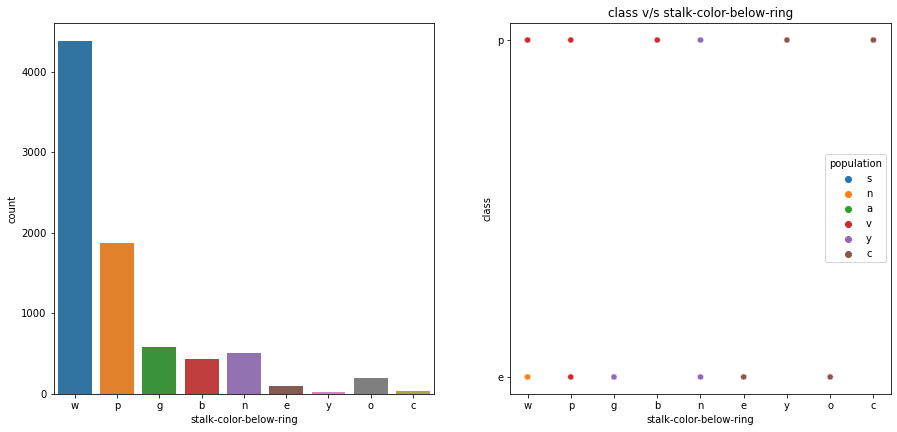

In [31]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['stalk-color-below-ring'])
plt.xlabel('stalk-color-below-ring')
plt.subplot(222)
sns.scatterplot(x= 'stalk-color-below-ring', y= 'class', data= mush, hue= 'population')
plt.xlabel('stalk-color-below-ring')
plt.ylabel('class')
plt.title('class v/s stalk-color-below-ring')
plt.show()

By looking at both the graphs of stalk-color-below-ring we can conclude that most mushrooms are present with w stalk-color-below-ring from the countplot and from scatterplot we can conclude that mushrooms with g, e and o stalk-color-below-ring have only edible mushrooms present in them and mushrooms with b, y and c stalk-color-below-ring have only poisnous mushrooms present in them. The rest of them with other stalk-color-below-ring species have both edible as well as poisnous mushrooms present in them.

14. stalk-surface-above-ring

In [32]:
mush['stalk-surface-above-ring'].unique()

array(['s', 'f', 'k', 'y'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


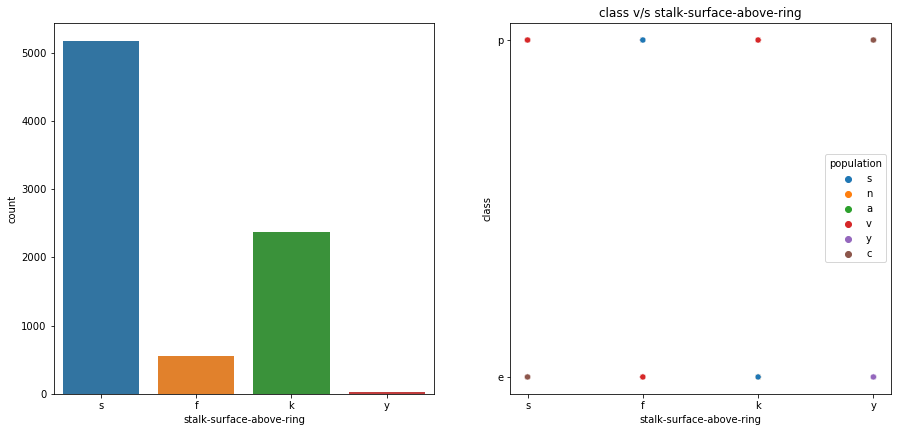

In [33]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['stalk-surface-above-ring'])
plt.xlabel('stalk-surface-above-ring')
plt.subplot(222)
sns.scatterplot(x= 'stalk-surface-above-ring', y= 'class', data= mush, hue= 'population')
plt.xlabel('stalk-surface-above-ring')
plt.ylabel('class')
plt.title('class v/s stalk-surface-above-ring')
plt.show()

By looking at both the graphs of stalk-surface-above-ring we can conclude that most mushrooms are present with the s stalk-surface-above-ring from countplot and from the scatterplot we cannot conclude anything.

15. stalk-surface-below-ring

In [34]:
mush['stalk-surface-below-ring'].unique()

array(['s', 'f', 'y', 'k'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


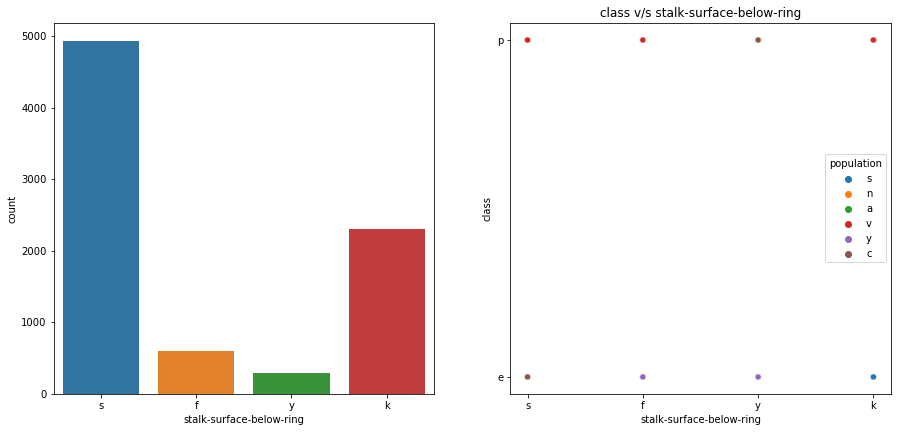

In [35]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['stalk-surface-below-ring'])
plt.xlabel('stalk-surface-below-ring')
plt.subplot(222)
sns.scatterplot(x= 'stalk-surface-below-ring', y= 'class', data= mush, hue= 'population')
plt.xlabel('stalk-surface-below-ring')
plt.ylabel('class')
plt.title('class v/s stalk-surface-below-ring')
plt.show()

By looking at both the graphs of stalk-surface-below-ring we can conclude that most mushrooms are present with the s stalk-surface-below-ring from countplot and from the scatterplot we cannot conclude anything.

16. veil-color

In [36]:
mush['veil-color'].unique()

array(['w', 'n', 'o', 'y'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


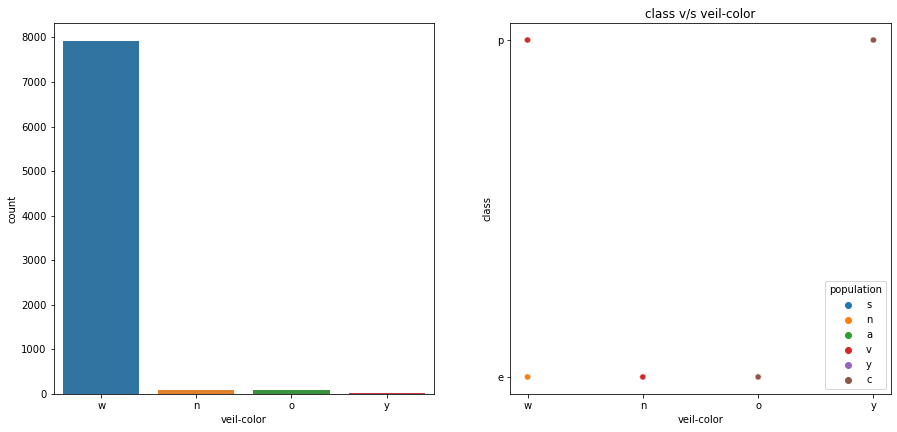

In [37]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['veil-color'])
plt.xlabel('veil-color')
plt.subplot(222)
sns.scatterplot(x= 'veil-color', y= 'class', data= mush, hue= 'population')
plt.xlabel('veil-color')
plt.ylabel('class')
plt.title('class v/s veil-color')
plt.show()

By looking at both the graphs of veil-color we can conclude that most of the mushrooms are present with w veil-color from countplot and from the scatterplot we can conclude that mushrooms with n and o veil-color have only edible mushrooms in them and rest of them have both edible as well as poisnous mushrooms present in them.

17. veil-type

In [38]:
mush['veil-type'].unique()

array(['p'], dtype=object)

As there is only one value present in the whole column of veil-type, so, we don't have to plot the graph for this column.

18. ring-number

In [39]:
mush['ring-number'].unique()

array(['o', 't', 'n'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


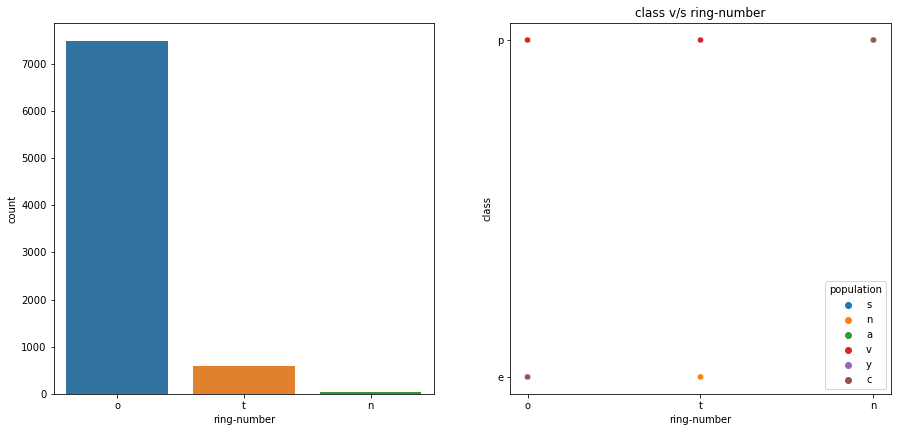

In [40]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['ring-number'])
plt.xlabel('ring-number')
plt.subplot(222)
sns.scatterplot(x= 'ring-number', y= 'class', data= mush, hue= 'population')
plt.xlabel('ring-number')
plt.ylabel('class')
plt.title('class v/s ring-number')
plt.show()

By looking at both the graphs of ring-number we can conclude that most mushrooms are present with o ring-number from the countplot and from the scatterplot we can conclude mushrooms with n ring-number has only poisnous mushrooms present in it and rest of them have both edible as well as poisnous mushrooms present in them.

19. ring-type

In [41]:
mush['ring-type'].unique()

array(['p', 'e', 'l', 'f', 'n'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


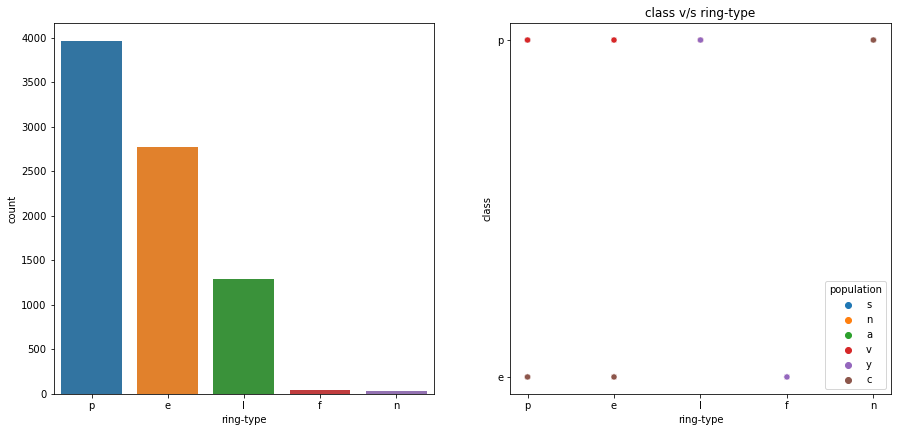

In [42]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['ring-type'])
plt.xlabel('ring-type')
plt.subplot(222)
sns.scatterplot(x= 'ring-type', y= 'class', data= mush, hue= 'population')
plt.xlabel('ring-type')
plt.ylabel('class')
plt.title('class v/s ring-type')
plt.show()

By looking at both the graphs of ring-type we can conclude that most mushrooms are present with p ring-type from the countplot and from the scatterplot we can conclude that mushrooms with l ring-type has only poisnous mushrooms and mushrooms with f ring-type has only edible mushrooms in it. The rest of mushrooms with other ring-type have both edible as well as poisnous mushrooms present in them.

20. spore-print-color

In [43]:
mush['spore-print-color'].unique()

array(['k', 'n', 'u', 'h', 'w', 'r', 'o', 'y', 'b'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


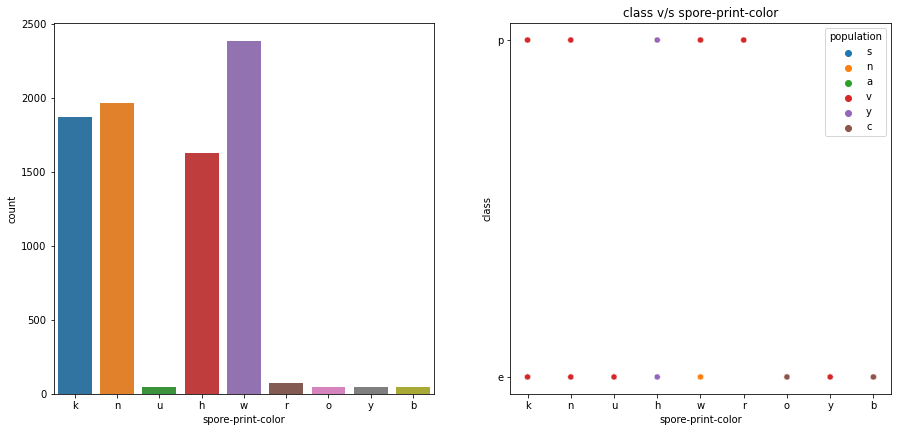

In [44]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['spore-print-color'])
plt.xlabel('spore-print-color')
plt.subplot(222)
sns.scatterplot(x= 'spore-print-color', y= 'class', data= mush, hue= 'population')
plt.xlabel('spore-print-color')
plt.ylabel('class')
plt.title('class v/s spore-print-color')
plt.show()

By looking at both the graphs of spore-print-color we can conclude that most mushrooms are present with the w spore-print-color from the countplot and from the scatterplot we can conclude that mushrooms with r spore-print-color has only poisnous mushrooms in them and mushrooms with u,o,y,b spore-print-color have only edible mushrooms in them. The rest of mushrooms with other spore-print-color have both edible as well as poisnous mushrooms present in them.

21. population.

In [45]:
mush['population'].unique()

array(['s', 'n', 'a', 'v', 'y', 'c'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


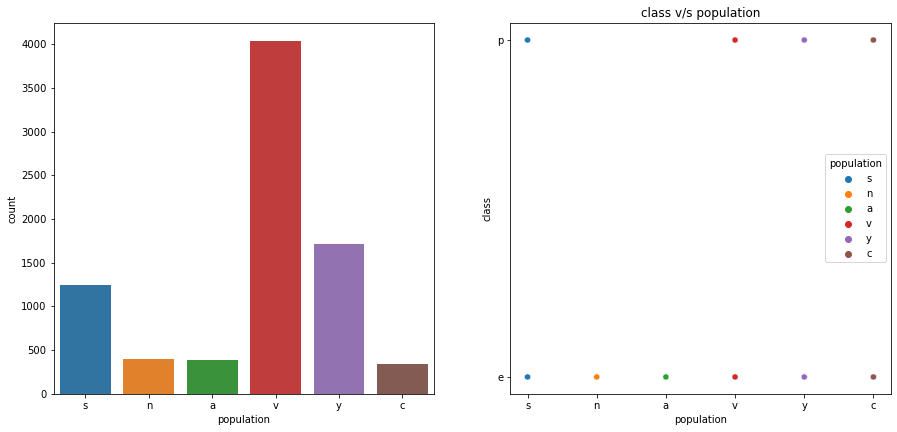

In [46]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['population'])
plt.xlabel('population')
plt.subplot(222)
sns.scatterplot(x= 'population', y= 'class', data= mush, hue= 'population')
plt.xlabel('population')
plt.ylabel('class')
plt.title('class v/s population')
plt.show()

By looking at both the graphs of population we can conclude that most mushrooms are present with the v population from the countplot and from the scatterplot we can conclude that mushrooms with population n and a has only edible class except other who has both edible and poisnous in them.

22. habitat.

In [47]:
mush['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


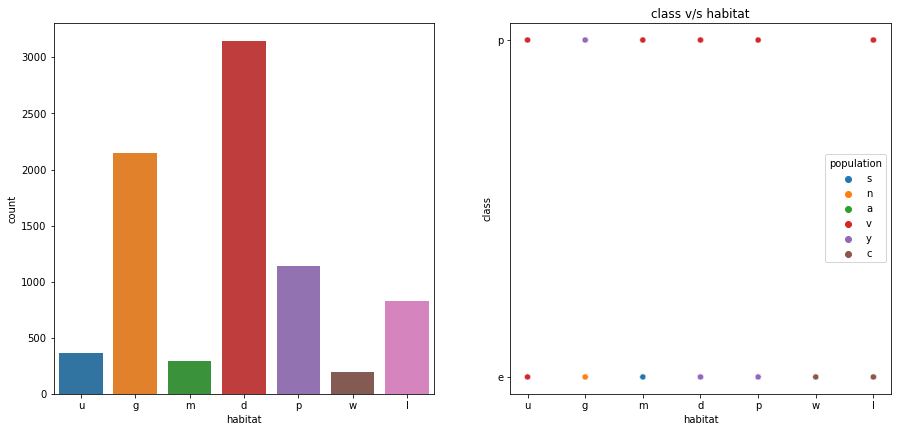

In [48]:
plt.figure(figsize= [15,15])
plt.subplot(221)
sns.countplot(mush['habitat'])
plt.xlabel('habitat')
plt.subplot(222)
sns.scatterplot(x= 'habitat', y= 'class', data= mush, hue= 'population')
plt.xlabel('habitat')
plt.ylabel('class')
plt.title('class v/s habitat')
plt.show()

By looking at both the graphs of habitat we can conclude that most mushrooms are present with the d habitat from the countplot and from the scatterplot we can conclude that mushrooms with w habitat are the only ones who has only edible class except other who have both edible as well as poisnous mushrroms present in them.

#### Converting the catagorical data to continuous data.

In [49]:
print(mush['cap-color'].unique())
print(mush['cap-shape'].unique())
print(mush['cap-surface'].unique())

['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']


In [50]:
mush['cap-color'] = mush['cap-color'].replace(['n','y','w','g','e','p','b','u','c','r'],[0,1,2,3,4,5,6,7,8,9])
mush['cap-shape'] = mush['cap-shape'].replace(['x','b','s','f','k','c'],[0,1,2,3,4,5])
mush['cap-surface'] = mush['cap-surface'].replace(['s','y','f','g'],[0,1,2,3])

In [51]:
print(mush['odor'].unique())
print(mush['bruises'].unique())

['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['t' 'f']


In [52]:
mush['odor'] = mush['odor'].replace(['p','a','l','n','f','c','y','s','m'],[0,1,2,3,4,5,6,7,8])
mush['bruises'] = mush['bruises'].replace(['t','f'],[0,1])

In [53]:
print(mush['gill-attachment'].unique())
print(mush['gill-color'].unique())
print(mush['gill-size'].unique())
print(mush['gill-spacing'].unique())

['f' 'a']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['n' 'b']
['c' 'w']


In [54]:
mush['gill-attachment'] = mush['gill-attachment'].replace(['f','a'],[0,1])
mush['gill-color'] = mush['gill-color'].replace(['k','n','g','p','w','h','u','e','b','r','y','o'],[0,1,2,3,4,5,6,7,8,9,10,11])
mush['gill-size'] = mush['gill-size'].replace(['n','b'],[0,1])
mush['gill-spacing'] = mush['gill-spacing'].replace(['c','w'],[0,1])

In [55]:
print(mush['stalk-color-above-ring'].unique())
print(mush['stalk-color-below-ring'].unique())
print(mush['stalk-root'].unique())
print(mush['stalk-shape'].unique())
print(mush['stalk-surface-above-ring'].unique())
print(mush['stalk-surface-below-ring'].unique())

['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['e' 'c' 'b' 'r' '?']
['e' 't']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']


In [56]:
mush['stalk-color-above-ring'] = mush['stalk-color-above-ring'].replace(['w','g','p','n','b','e','o','c','y'],[0,1,2,3,4,5,6,7,8])
mush['stalk-color-below-ring'] = mush['stalk-color-below-ring'].replace(['w','g','p','n','b','e','o','c','y'],[0,1,2,3,4,5,6,7,8])
mush['stalk-root'] = mush['stalk-root'].replace(['e','c','b','r','?'],[0,1,2,3,4])
mush['stalk-shape'] = mush['stalk-shape'].replace(['e','t'],[0,1])
mush['stalk-surface-above-ring'] = mush['stalk-surface-above-ring'].replace(['s','f','k','y'],[0,1,2,3])
mush['stalk-surface-below-ring'] = mush['stalk-surface-below-ring'].replace(['s','f','k','y'],[0,1,2,3])

In [57]:
print(mush['veil-color'].unique())
print(mush['veil-type'].unique())

['w' 'n' 'o' 'y']
['p']


In [58]:
mush['veil-color'] = mush['veil-color'].replace(['w','n','o','y'],[0,1,2,3])
mush['veil-type'] = mush['veil-type'].replace(['p'],[0])

In [59]:
print(mush['ring-type'].unique())
print(mush['ring-number'].unique())

['p' 'e' 'l' 'f' 'n']
['o' 't' 'n']


In [60]:
mush['ring-type'] = mush['ring-type'].replace(['p','e','l','f','n'],[0,1,2,3,4])
mush['ring-number'] = mush['ring-number'].replace(['o','t','n'],[0,1,2])

In [61]:
print(mush['spore-print-color'].unique())
print(mush['habitat'].unique())
print(mush['population'].unique())

['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['u' 'g' 'm' 'd' 'p' 'w' 'l']
['s' 'n' 'a' 'v' 'y' 'c']


In [62]:
mush['spore-print-color'] = mush['spore-print-color'].replace(['k','n','u','h','w','r','o','y','b'],[0,1,2,3,4,5,6,7,8])
mush['habitat'] = mush['habitat'].replace(['u','g','m','d','p','w','l'],[0,1,2,3,4,5,6])
mush['population'] = mush['population'].replace(['s','n','a','v','y','c'],[0,1,2,3,4,5])

In [63]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,e,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,e,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,p,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,e,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


#### Splitting data into target column and rest of the columns

In [64]:
X = mush.drop(['class'], axis= 1)
y = mush['class']

In [65]:
lr = LogisticRegression()
dtree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5)

#### Checking cross validaton score for both algorithms

In [66]:
cross_val_score(lr, X, y, cv= 5)

C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vibhu_o95hv7f\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

array([0.84246154, 0.99507692, 0.96061538, 0.99630769, 0.62684729])

In [67]:
cross_val_score(dtree, X, y, cv= 5)

array([0.84246154, 0.99938462, 0.94953846, 1.        , 0.69950739])

By calculating average cross_val_score for both algorithms, we can conclude that Decision tree classifier algorithm is more accurate in this dataset prediction as compare to logistic regression algorithm.

#### Splitting the data into test and train data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 1)

In [69]:
pred = dtree.fit(X_train, y_train).predict(X_test)

In [70]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': pred})

df.head()

,Actual,Prediction
1392,e,e
4051,p,p
3725,p,p
7177,p,p
103,e,e


#### Now checking the accuracy of model using different metrics

In [71]:
print('Accuracy score : ', metrics.accuracy_score(y_test, pred))
print('Confusion metrics : ')
metrics.confusion_matrix(y_test, pred)

Accuracy score :  0.9967186218211649
Confusion metrics : 


array([[1236,    0],
       [   8, 1194]], dtype=int64)

#### By looking at both metrics result we can conclude that this model is very accurate in prediction of this dataset. The accuracy score 0.996 which is very high and in confusion metrics there are only 8 false negative outcome, else the other outcomes are very accurate. Hence the model is precise and accurate for this model. So, the objective has been achieved.